## Multiple Linear Regression model For Predicting House Price and Cross-Validation for Alpha value.
pwd

In [303]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [304]:
df = pd.read_csv('D:/College and Educational/Data Analytics Course/Data+Analyst+Skillpath_+Zero+to+Hero+in+Excel,+SQL+&+Python/Data Analyst Skillpath_ Zero to Hero in Excel, SQL & Python/Data files/Part 3 - Regression using Python/House_Price.csv', header=0)

In [305]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [306]:
df.shape

(506, 19)

In [307]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


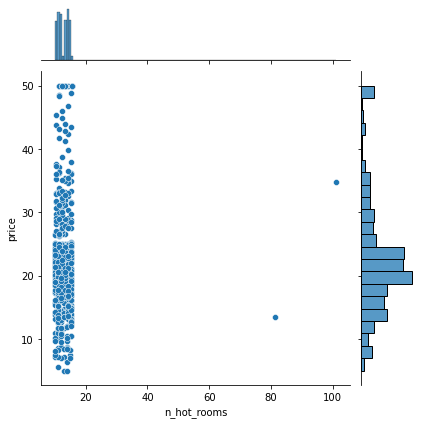

In [308]:
sns.jointplot(x='n_hot_rooms', y='price', data=df)

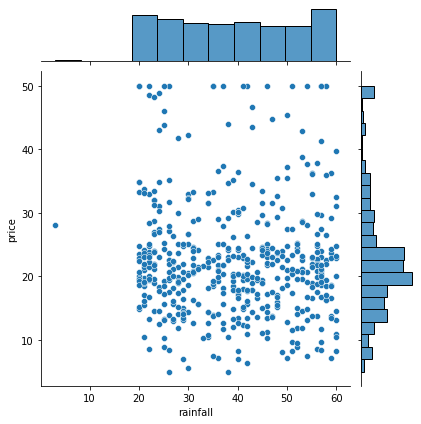

In [309]:
sns.jointplot(x="rainfall", y="price", data=df)

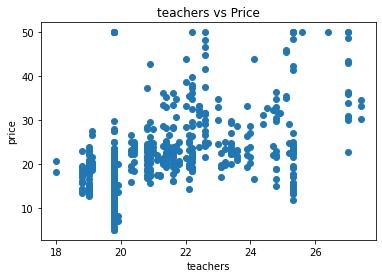

In [310]:
x_1 = df['teachers']
y_1 = df['price']

plt.scatter(x_1, y_1)

# Add labels and title
plt.xlabel('teachers')
plt.ylabel('price')
plt.title('teachers vs Price')

# Show the plot
plt.show()

#### Understandings from above teacher vs Price Graph
* Price of house doesnt shows a linear path 
* Due to which we say that the effect of house price doesn't depend much of number of teachers available in that area.
* hence we can exclude teachers count from our analysis to predict housing price and make our analysis from the attributes which are highly co-related in predicting house prices.

In [311]:
del df['teachers']

In [312]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


<AxesSubplot:xlabel='airport', ylabel='count'>

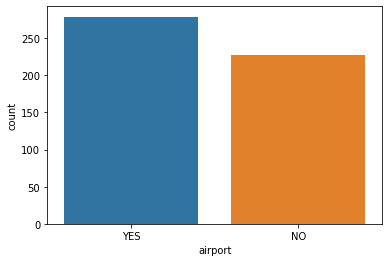

In [313]:
sns.countplot(x="airport", data=df)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

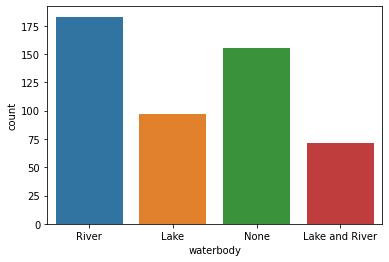

In [314]:
sns.countplot(x="waterbody", data = df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

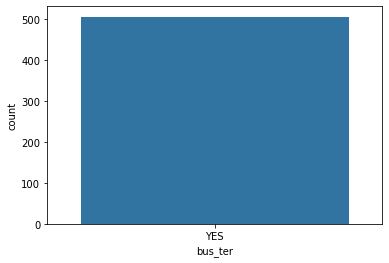

In [315]:
sns.countplot(x="bus_ter", data=df)

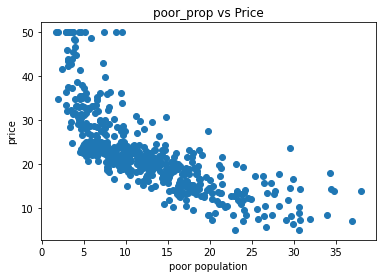

In [316]:
x_2 = df['poor_prop']
y_2 = df['price']

plt.scatter(x_2, y_2)

# Add labels and title
plt.xlabel('poor population')
plt.ylabel('price')
plt.title('poor_prop vs Price')

# Show the plot
plt.show()

* price to poor population shows a kind of non-linear or logrithmic grapgh which can created abnormalities while predicting the more accurate house price 
* so we process this poor_prop values by taking the log of all the values individualy which will gives us more linear relation than previous value can be fitted better with linear regression model.

In [317]:
df.poor_prop = np.log(1+df.poor_prop)

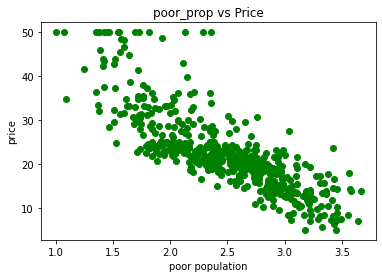

In [318]:
x_2 = df['poor_prop']
y_2 = df['price']

plt.scatter(x_2, y_2,color='green')

# Add labels and title
plt.xlabel('poor population')
plt.ylabel('price')
plt.title('poor_prop vs Price')

# Show the plot
plt.show()

### Observations
1. Missing values in n_hos_beds
2. Skewness or outliers in crime rate
3. Outliers in n_hot_rooms and rainfall
4. Bus_ter has only 'Yes' values

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
dtypes: float64(14), int64(1), object(3)
memory usage: 

In [320]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [321]:
np.percentile(df.n_hot_rooms,[99])[0]

15.39952

In [322]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [323]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,1.615420,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,1.547563,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,1.355835,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,2.132982,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,1.553925,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,3.190065,NO,8.268,81.12,Lake,29,YES,0.063344


In [324]:
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv

C:\Users\shubh\AppData\Local\Temp/ipykernel_10672/2840720320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv


In [325]:
np.percentile(df.rainfall,[1])[0]

20.0

In [326]:
lv = np.percentile(df.rainfall,[1])[0]

In [327]:
df[(df.rainfall< lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,2.339881,YES,7.562,10.2248,None,3,YES,0.044019


In [328]:
df.rainfall[(df.rainfall <0.3*lv)] = 0.3*lv

C:\Users\shubh\AppData\Local\Temp/ipykernel_10672/2206257297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall <0.3*lv)] = 0.3*lv


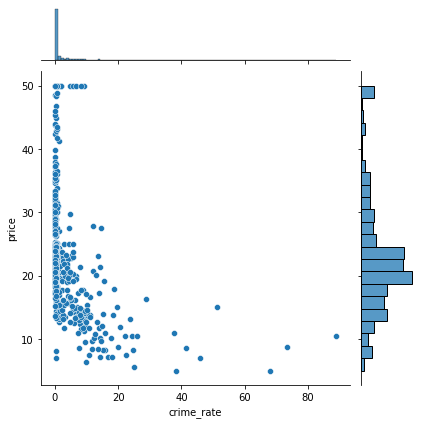

In [329]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [330]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,2.475610,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,0.539033,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,1.004302,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,2.073162,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,2.514464,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,2.887869,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,3.662792,10.876000,46.198560,60.000000,0.086711


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
dtypes: float64(14), int64(1), object(3)
memory usage: 

In [332]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   506 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
dtypes: float64(14), int64(1), object(3)
memory usage: 

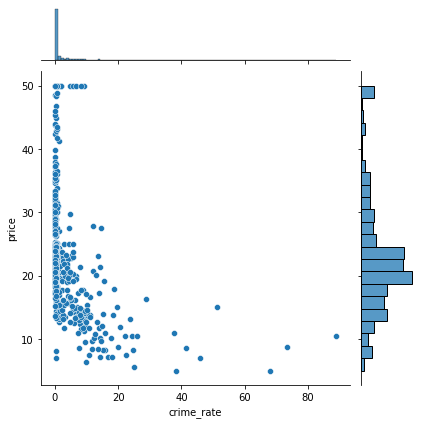

In [334]:
sns.jointplot(x="crime_rate", y="price",data=df)

In [335]:
df.crime_rate = np.log(1+df.crime_rate)

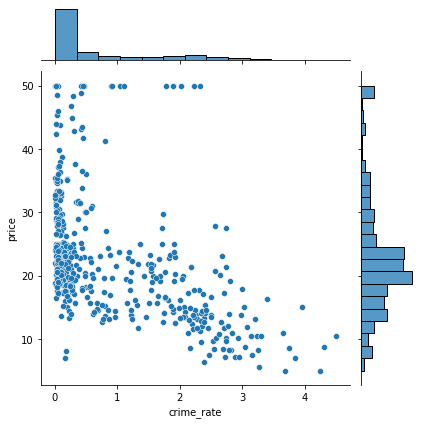

In [336]:
sns.jointplot(x="crime_rate", y="price",data=df)

In [337]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [338]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,2.475610,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,0.539033,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,1.004302,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,2.073162,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,2.514464,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,2.887869,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,3.662792,10.876000,46.198560,60.000000,0.086711,12.127500


In [339]:
del df['dist1']

In [340]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist2,dist3,dist4,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.628775,3.960672,3.618972,2.475610,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108580,2.119797,2.099203,0.539033,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,0.920000,1.150000,0.730000,1.004302,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,1.940000,2.232500,1.940000,2.073162,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.010000,3.375000,3.070000,2.514464,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,4.992500,5.407500,4.985000,2.887869,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,11.930000,12.320000,11.940000,3.662792,10.876000,46.198560,60.000000,0.086711,12.127500


In [341]:
del df['dist2']

In [342]:
del df['dist3']

In [343]:
del df['dist4']

In [344]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,2.475610,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,0.539033,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.004302,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.073162,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,2.514464,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,2.887869,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,3.662792,10.876000,46.198560,60.000000,0.086711,12.127500


In [345]:
del df['bus_ter']

In [346]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,1.788421,YES,5.480,11.19200,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,2.316488,NO,7.332,12.17280,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,1.615420,NO,7.394,46.19856,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,1.371181,YES,9.268,11.26720,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,1.845300,NO,8.824,11.28960,Lake,55,0.039474,6.0625


In [347]:
df = pd.get_dummies(df)

In [348]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,1.788421,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,2.316488,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,1.615420,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,1.371181,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,1.845300,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [349]:
del df['airport_NO']

In [350]:
del df['waterbody_None']

In [351]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,1.788421,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,2.316488,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,1.615420,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,1.371181,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,1.845300,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [352]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,-0.813626,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,0.561023,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,0.605194,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,0.584484,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,-0.661247,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,0.613294,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
poor_prop,-0.813626,0.561023,0.605194,0.584484,-0.661247,0.613294,1.000000,-0.078025,-0.000127,0.056674,0.547898,-0.488000,-0.100669,-0.019283,0.045176,-0.115614
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.078025,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.000127,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096
rainfall,-0.047200,0.082151,0.055845,0.091956,-0.064718,0.074684,0.056674,0.058596,0.014869,1.000000,0.078278,-0.037285,-0.013171,-0.016170,0.109234,-0.037016


In [353]:
del df['parks']

In [354]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,1.788421,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,2.316488,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,1.615420,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,1.371181,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,1.845300,8.824,11.28960,55,6.0625,0,1,0,0


In [355]:
import statsmodels.api as sn

In [356]:
X = sn.add_constant(df['room_num'])

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [357]:
lm = sn.OLS(df['price'], X).fit()

In [358]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.31e-74
Time:                        13:31:37   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [359]:
from sklearn.linear_model import LinearRegression

In [360]:
from sklearn.model_selection import train_test_split

In [361]:
y = df['price']

In [362]:
X = df[['room_num']]

In [363]:
lm2 = LinearRegression()

In [364]:
lm2.fit(X,y)

LinearRegression()

In [365]:
print(lm2.intercept_, lm2.coef_)

-34.65924312309721 [9.09966966]


In [366]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 | 

In [367]:
lm2.predict(X).shape

(506,)

In [368]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

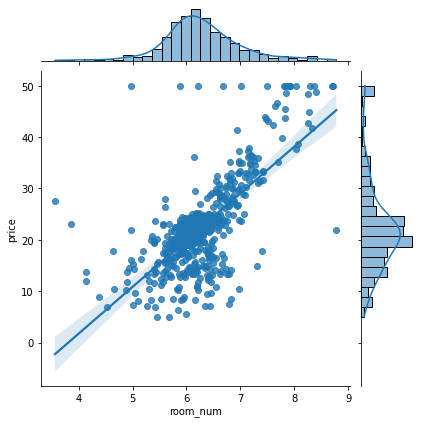

In [369]:
sns.jointplot(x = df['room_num'], y = df['price'], data =df, kind = 'reg')

## Applying Linear Regression model to know how much data can be accurately be predicted on test data

In [370]:
X_multi = df.drop("price",axis=1)

In [371]:
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,1.788421,5.480,11.19200,23,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,2.316488,7.332,12.17280,42,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,1.615420,7.394,46.19856,38,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,1.371181,9.268,11.26720,45,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,1.845300,8.824,11.28960,55,6.0625,0,1,0,0


In [372]:
y_multi = df['price']

In [373]:
y_multi.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [374]:
X_multi_cons = sn.add_constant(X_multi)

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [375]:
X_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,1.788421,5.480,11.19200,23,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,2.316488,7.332,12.17280,42,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,1.615420,7.394,46.19856,38,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,1.371181,9.268,11.26720,45,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,1.845300,8.824,11.28960,55,6.0625,0,1,0,0


In [376]:
X_train, X_test, Y_train, Y_test = train_test_split(X_multi_cons,y_multi,test_size = 0.2, random_state = 10)

In [377]:
X_train.head()

,const,crime_rate,resid_area,air_qual,room_num,age,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
50,1.0,0.085012,35.64,0.439,5.963,45.7,2.670694,7.899767,11.1576,21,6.8150,1,0,0,1
367,1.0,2.675679,48.10,0.631,3.863,100.0,2.662355,9.962000,11.1848,24,1.5075,0,1,0,0
34,1.0,0.960430,38.14,0.538,6.096,96.9,3.060583,9.670000,11.1080,40,3.7600,1,0,0,0
78,1.0,0.054924,42.83,0.437,6.232,53.7,2.590767,8.824000,15.1696,53,5.0150,1,1,0,0
172,1.0,0.130274,34.05,0.510,5.572,88.5,2.753024,9.362000,12.1848,38,2.5975,0,0,0,1


In [378]:
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

In [379]:
lm_multi_2 = sn.OLS(Y_train, X_train).fit()

In [380]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     103.6
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          1.57e-136
Time:                        13:31:40   Log-Likelihood:                -1491.6
No. Observations:                 506   AIC:                             3013.
Df Residuals:                     491   BIC:                             3077.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       39.1438      5.185      7.550      0.000      28.957      49.331
crime_rate                  -0.8589      0.309     -2.776      0.006      -1.467      -0.251
resid_area                  -0.1143      0.053     -2.137      0.033      -0.219      -0.009
air_qual                    -4.7221      3.624     -1.303      0.193     -11.843       2.399
room_num                     3.0185      0.423      7.134      0.000       2.187       3.850
age                          0.0170      0.013      1.288      0.198      -0.009       0.043
poor_prop                  -11.3348      0.700    -16.182      0.000     -12.711      -9.959
n_hos_beds                   0.2491      0.145      1.718      0.086      -0.036       0.534
n_hot_rooms                  0.0514      0.078      0.658      0.511      -0.102       0.205
rainfall                     0.0070      0.017      0.411      0.681      -0.026       0.040
avg_dist                    -1.0723      0.180     -5.960      0.000      -1.426      -0.719
airport_YES                  1.0363      0.432      2.401      0.017       0.188       1.884
waterbody_Lake               0.3247      0.609      0.533      0.594      -0.872       1.521
waterbody_Lake and River    -0.2670      0.680     -0.393      0.695      -1.603       1.069
waterbody_River             -0.2758      0.519     -0.531      0.596      -1.296       0.745
==============================================================================
Omnibus:                      117.350   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.388
Skew:                           1.102   Prob(JB):                     7.39e-75
Kurtosis:                       6.367   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
lm_multi_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     83.42
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          1.06e-107
Time:                        13:31:40   Log-Likelihood:                -1170.4
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     389   BIC:                             2431.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       44.3755      5.624      7.891      0.000      33.319      55.432
crime_rate                  -1.0768      0.317     -3.398      0.001      -1.700      -0.454
resid_area                  -0.1259      0.057     -2.216      0.027      -0.238      -0.014
air_qual                    -4.5746      3.812     -1.200      0.231     -12.069       2.920
room_num                     2.4867      0.453      5.486      0.000       1.595       3.378
age                          0.0298      0.015      2.039      0.042       0.001       0.059
poor_prop                  -11.9111      0.744    -16.014      0.000     -13.373     -10.449
n_hos_beds                   0.1207      0.159      0.761      0.447      -0.191       0.433
n_hot_rooms                  0.0695      0.078      0.887      0.376      -0.085       0.224
rainfall                     0.0014      0.018      0.077      0.939      -0.034       0.037
avg_dist                    -1.0222      0.195     -5.241      0.000      -1.406      -0.639
airport_YES                  0.6541      0.462      1.414      0.158      -0.255       1.563
waterbody_Lake               0.4948      0.650      0.761      0.447      -0.784       1.773
waterbody_Lake and River     0.5884      0.724      0.813      0.417      -0.834       2.011
waterbody_River             -0.1458      0.554     -0.263      0.793      -1.235       0.944
==============================================================================
Omnibus:                       93.579   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.240
Skew:                           1.094   Prob(JB):                     8.39e-57
Kurtosis:                       6.249   Cond. No.                     2.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [382]:
lm3 = LinearRegression()

In [383]:
lm4 = LinearRegression()

In [384]:
lm4.fit(X_train,Y_train)

LinearRegression()

In [385]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [386]:
print(lm4.intercept_, lm4.coef_)

44.37554965956135 [ 0.00000000e+00 -1.07682878e+00 -1.25925227e-01 -4.57462062e+00
  2.48666830e+00  2.98187980e-02 -1.19111198e+01  1.20749940e-01
  6.94863454e-02  1.39848830e-03 -1.02218186e+00  6.54085339e-01
  4.94804906e-01  5.88435298e-01 -1.45834458e-01]


In [387]:
lm4.predict(X_test)

array([27.38537074, 29.44851916, 28.9320398 , 26.90668337, 17.75920289,
       17.4868858 , 44.51094384, 16.68401726, 20.95193033, 42.30801026,
       23.31983113, 27.87056882, 26.96394516, 37.61157255, 32.38538656,
       37.76441172, 28.70091533, 22.3813304 , 25.05156794, 19.00793895,
       34.90873858, 16.72120781, 25.70234607, 28.06125841, 37.23027603,
       22.03761036, 15.54873357, 15.76685079, 39.80945317,  4.91649905,
       25.9482057 , 31.64872448, 25.66652233, 24.28286381, 16.93604606,
       20.52339931,  8.07129034, 35.71427238, 29.8156518 , 28.22315466,
       37.85084473, 29.46033604, 14.95055644, 31.00736335, 15.67771394,
       28.77490033, 19.18302   , 18.50846858, 37.74844043, 18.68335258,
       21.98988746, 16.22067947, 21.76057385, 40.29527153, 32.24164338,
       29.6704689 , 20.665131  , 19.38823718, 16.81816155, 22.13384536,
       22.13357744, 22.57785433, 40.77163007, 39.85359948, 32.08957336,
       18.61179522, 26.12717992,  4.35277155, 34.70602961, 33.37

In [388]:
Y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
208    24.4
174    22.6
108    19.8
242    22.2
102    18.6
Name: price, Length: 102, dtype: float64

In [389]:
lm4.score(X_test,Y_test)

0.7037710913620089

## Applying Ridge Regression model to know how much data can be accurately be predicted on test data.

In [390]:
from sklearn.linear_model import Ridge

In [391]:
from sklearn.preprocessing import StandardScaler

In [392]:
from sklearn.model_selection import GridSearchCV

In [393]:
from sklearn.linear_model import RidgeCV

In [394]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [395]:
#alpha = 10.0  # Regularization strength, tune this parameter
ridge_model = Ridge()
alphas = [0.1, 1, 10, 100]
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
#ridge_model = Ridge(alpha=alpha)

In [396]:
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [397]:
ridge_model.fit(X_train_scaled, Y_train)

Ridge()

In [398]:
best_alpha = grid_search.best_params_

In [399]:
print(best_alpha)

{'alpha': 10}


In [400]:
y_pred_ridge = ridge_model.predict(X_train_scaled)
print(y_pred_ridge)

[17.50893723 14.31960863 16.49596166 21.40267641 20.53086431 16.91319886
 33.08327945 18.08062383 14.27644645 20.15753499 26.53920726 26.99578962
 25.10958912 15.45122605 12.32148335 16.74393295 16.07908722 18.61659311
 38.68869923 30.77017    21.58425132 10.16514951 18.63593457 28.54466386
 14.05600272 21.16943351 23.2582402  32.95347123 31.84404161  7.80849968
 35.30294371 30.81414069 16.61428991 26.41240567 24.86996909 31.37064009
  6.99839409 11.85066845 31.27289824 11.26881901 15.53444025 18.15394519
  9.71227955 11.78696745 33.5464951  26.31384504 24.31199402 20.5685738
 16.71103152 16.53500269 39.33144472 23.1066516  10.43406868 20.06725102
 24.53980016  8.59267495 13.22139671 29.51495743 11.51829932 14.17972073
 16.91003966 17.7038033  32.26875836 21.80099328 27.30130485  7.39175057
 22.55854885  6.50667416 27.54405135 20.04167534 24.67352916 32.1111729
 27.90963219 18.07038433 13.68402887 25.29520408 21.94546947 17.35403903
 22.93152185 22.03993687 22.73889489 20.80087774 10.5

In [401]:
ridge_model.score(X_test_scaled,Y_test)

0.7041235578100224

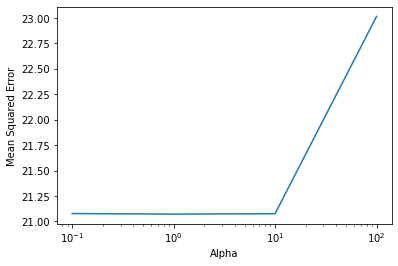

1.0


In [402]:
# Specify the alpha values for RidgeCV initialization
alphas = [0.1, 1, 10, 100]

# Initialize RidgeCV with specified alphas
ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True, cv=None)

# Fit the model to the data
ridge_cv_model.fit(X_train_scaled, Y_train)

# Plot the cross-validation performance using specified alphas
plt.plot(alphas, ridge_cv_model.cv_values_.mean(axis=0))
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')
plt.show()

# Get the best alpha value
best_alpha = ridge_cv_model.alpha_
print(best_alpha)

* By doing Cross-Validation over the alphas value over every entry of data to calculated MSE we found that alpha of 1 provides the best result.